###### KERAS INTRODUCTION ######

In [2]:
#####

##### Anomaly Detection ####

https://keras.io/examples/timeseries/timeseries_anomaly_detection/

In [6]:
# Importing Numpy for numerical arrays

import numpy as np

# Importing Pandas for creating dataframes

import pandas as pd

# Importing Keras from tensorflow library - Neural Networks

from tensorflow import keras

# Importing layers of Neural Networks

from tensorflow.keras import layers

# Importing pyplot for plotting figures

from matplotlib import pyplot as plt


#### Load the Data

https://www.kaggle.com/datasets/boltzmannbrain/nab

The Keras model is using data from the Numenta Anomaly Benchmark (NAB) dataset. The (NAB) is a novel benchmark for evaluating algorithms for anomaly detection in streaming, online applications. It is comprised of over 50 labeled real-world and artificial timeseries data files plus a novel scoring mechanism designed for real-time applications. All of the data and code is fully open-source.

The below model uses two of these datasets - art_daily_small_noise.csv & art_daily_jumpsup.csv.

In [12]:
master_url_root = "https://raw.githubusercontent.com/numenta/NAB/master/data/"

# Data without anomaly

df_small_noise_url_suffix = "artificialNoAnomaly/art_daily_small_noise.csv"
df_small_noise_url = master_url_root + df_small_noise_url_suffix
df_small_noise = pd.read_csv(
    df_small_noise_url, parse_dates=True, index_col="timestamp"
)

# Data with anomaly

df_daily_jumpsup_url_suffix = "artificialWithAnomaly/art_daily_jumpsup.csv"
df_daily_jumpsup_url = master_url_root + df_daily_jumpsup_url_suffix
df_daily_jumpsup = pd.read_csv(
    df_daily_jumpsup_url, parse_dates=True, index_col="timestamp"
)


In [13]:
# URL paths for data - to be used for descriptive stats

url_no_anomaly = "https://github.com/numenta/NAB/blob/master/data/artificialNoAnomaly/art_daily_small_noise.csv"
    
url_with_anomaly = "https://github.com/numenta/NAB/blob/master/data/artificialWithAnomaly/art_daily_jumpsup.csv"

# Read in csv files from respective paths

df_small_noise = pd.read_csv(url_no_anomaly, parse_dates=True, index_col="timestamp") 

df_daily_jumpsup = pd.read_csv(url_with_anomaly, parse_dates=True, index_col="timestamp")

ValueError: 'timestamp' is not in list

#### No Anomaly #### 

In [9]:
# Print data without anomaly. Defaults to first 5 rows but this can be changed by inserting a number.

print(df_small_noise.head()) 


                         value
timestamp                     
2014-04-01 00:00:00  18.324919
2014-04-01 00:05:00  21.970327
2014-04-01 00:10:00  18.624806
2014-04-01 00:15:00  21.953684
2014-04-01 00:20:00  21.909120


In [11]:
# Using Pandas'shape' attribute to get the shape of the data.

df_small_noise.shape

(4032, 1)

4032 rows & 1 column

In [10]:
# Getting descriptive stats - No anomaly

df_small_noise.describe()

,value
count,4032.000000
mean,42.438353
std,28.077122
min,18.000964
25%,19.841390
50%,21.608487
75%,75.450282
max,87.976128


The 'describe' function gives a overview of the data in the file.

Count - # of rows of data.

Mean - The average value.

STD - Standard deviation of the values.

Min - Minimum value observed.

Percentiles - 25, 50 & 75. 50 is the same as the median. From the above, we can see that 25% of values are 19.841 or lower. 75 % of values are 75.450 or lower.

Max - The maximum observed value.



In [ ]:
# Plotting Data - No anomaly

In [ ]:
fig, ax = plt.subplots(figsize = (15,5))
df_small_noise.plot(legend=False, ax=ax)
plt.show()


#### With Anomaly ####

In [14]:
print(df_daily_jumpsup.head())

                         value
timestamp                     
2014-04-01 00:00:00  19.761252
2014-04-01 00:05:00  20.500833
2014-04-01 00:10:00  19.961641
2014-04-01 00:15:00  21.490266
2014-04-01 00:20:00  20.187739


In [17]:
df_daily_jumpsup.shape

(4032, 1)

Again, 4032 rows & 1 column


In [15]:
df_daily_jumpsup.describe()

,value
count,4032.000000
mean,44.494254
std,32.432473
min,18.001010
25%,19.991382
50%,21.648503
75%,76.435943
max,164.947481


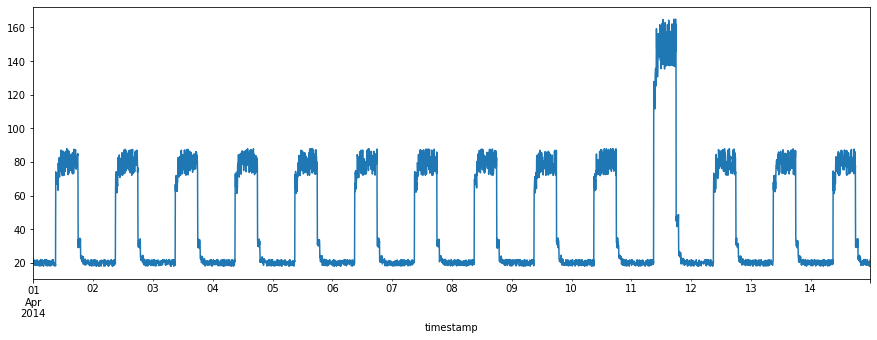

In [18]:
fig, ax = plt.subplots(figsize = (15,5))
df_daily_jumpsup.plot(legend=False, ax=ax)
plt.show()


Using the same functions as we did on the dataset without an anomaly, we can see the difference most clearly in the graph above.  The values between the 11th & 12th are clearly out of sync with the other dates.

#### Preprocessing

In [19]:


# 
train_mean = df_small_noise.mean()

train_mean



value    42.438353
dtype: float64

In [20]:


# 
train_std = df_small_noise.std()

train_std



value    28.077122
dtype: float64

In [21]:


# 
df_train_vals = (df_small_noise - train_mean) / train_std



In [22]:


# 
df_train_vals.head()



,value
timestamp,
2014-04-01 00:00:00,-0.858829
2014-04-01 00:05:00,-0.728993
2014-04-01 00:10:00,-0.848148
2014-04-01 00:15:00,-0.729586
2014-04-01 00:20:00,-0.731173


In [24]:


# 
df_small_noise['less_mean'] = df_small_noise['value'] - df_small_noise['value'].mean()
df_small_noise['div_std'] = df_small_noise['less_mean'] / df_small_noise['value'].std()



In [23]:


df_small_noise



,value
timestamp,
2014-04-01 00:00:00,18.324919
2014-04-01 00:05:00,21.970327
2014-04-01 00:10:00,18.624806
2014-04-01 00:15:00,21.953684
2014-04-01 00:20:00,21.909120
...,...
2014-04-14 23:35:00,20.211195
2014-04-14 23:40:00,20.531041
2014-04-14 23:45:00,19.032127


In [25]:


df_small_noise['value'].mean(), df_small_noise['less_mean'].mean(), df_small_noise['div_std'].mean()



(42.438353335806646, -7.342627387941552e-14, -2.616541242931684e-15)

In [26]:


df_small_noise['value'].std(), df_small_noise['less_mean'].std(), df_small_noise['div_std'].std()



(28.077122281262515, 28.077122281262508, 1.0000000000000018)

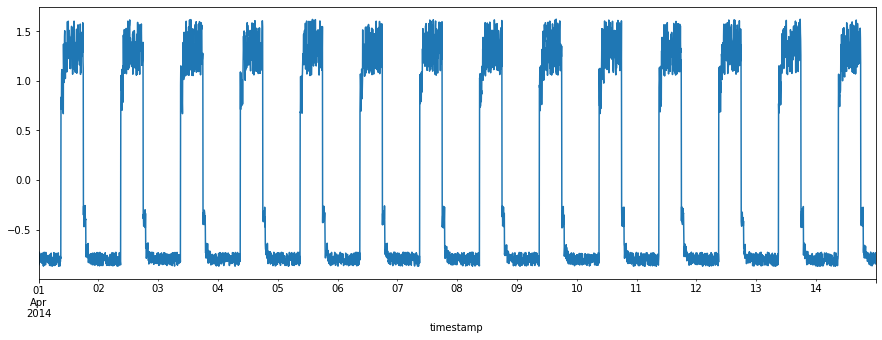

In [28]:


# 
fig, ax = plt.subplots(figsize=(15,5))

# Use pandas to plot data frame.
df_train_vals.plot(legend=False, ax=ax);



In [29]:


# 
df_train_vals.shape



(4032, 1)

In [31]:


# 
window_size = 288





Window example:

[1, 1, 2, 4, 5, 6, 7, 1, 2, 3, 4, 5]

window_size = 3

[1, 1, 2]

[1, 2, 4]

[2, 4, 5]

[4, 5, 6]

...



In [33]:


# Window list example.
L = [1, 1, 2, 4, 5, 6, 7, 1, 2, 3, 4, 5]
# Example window size.
win_size = 3
# Length of L.
len(L)



12

In [34]:
# Number of windows from L.
len(L) - (win_size - 1)

10

In [35]:
# Print the windows.
for i in range(len(L) - win_size + 1):
    print(L[i:i + win_size])

[1, 1, 2]
[1, 2, 4]
[2, 4, 5]
[4, 5, 6]
[5, 6, 7]
[6, 7, 1]
[7, 1, 2]
[1, 2, 3]
[2, 3, 4]
[3, 4, 5]


In [36]:


# For accumulating the windows.
wins = []

# Generate the windows
for i in range(len(L) - win_size + 1):
    wins.append(L[i:i + win_size])

wins



[[1, 1, 2],
 [1, 2, 4],
 [2, 4, 5],
 [4, 5, 6],
 [5, 6, 7],
 [6, 7, 1],
 [7, 1, 2],
 [1, 2, 3],
 [2, 3, 4],
 [3, 4, 5]]

In [37]:


# Create a 2D numpy array from wins.
np.stack(wins)



array([[1, 1, 2],
       [1, 2, 4],
       [2, 4, 5],
       [4, 5, 6],
       [5, 6, 7],
       [6, 7, 1],
       [7, 1, 2],
       [1, 2, 3],
       [2, 3, 4],
       [3, 4, 5]])

In [39]:
# 
def windows(vals, N=window_size):
  # 
  L = []
  # 
  for i in range(len(vals) - N + 1):
    # 
    L.append(vals[i:i+N])
  # Stack
  return np.stack(L)

In [40]:
# 
x_train = windows(df_train_vals)

In [41]:


# 
x_train[0][0], x_train[-1][-1]



(array([-0.85882857]), array([-0.8460886]))

In [42]:


# 
df_train_vals.iloc[0], df_train_vals.iloc[-1]



(value   -0.858829
 Name: 2014-04-01 00:00:00, dtype: float64,
 value   -0.846089
 Name: 2014-04-14 23:55:00, dtype: float64)

In [43]:
# 
x_train.shape

(3745, 288, 1)

In [44]:


#
df_train_vals['value'].values



array([-0.85882857, -0.72899302, -0.84814772, ..., -0.83364049,
       -0.73510213, -0.8460886 ])

In [45]:


# 
x_train[0].flatten()



array([-0.85882857, -0.72899302, -0.84814772, -0.72958579, -0.731173  ,
       -0.75730984, -0.77645641, -0.7880838 , -0.747012  , -0.829166  ,
       -0.80377285, -0.7821597 , -0.81182078, -0.80949918, -0.82334701,
       -0.79001779, -0.74922405, -0.84169024, -0.73727717, -0.77223023,
       -0.75311352, -0.79116337, -0.75934728, -0.86809294, -0.75381057,
       -0.86468256, -0.74361965, -0.72908121, -0.82850668, -0.84043795,
       -0.76136364, -0.8343536 , -0.74708881, -0.85574949, -0.85245676,
       -0.73090636, -0.77440264, -0.74974936, -0.82419543, -0.77402585,
       -0.78574242, -0.7844733 , -0.77316412, -0.78843253, -0.80927467,
       -0.83109167, -0.76090519, -0.83816509, -0.77176485, -0.83715923,
       -0.78131343, -0.76396862, -0.83924191, -0.86186112, -0.85174179,
       -0.78406773, -0.74938477, -0.86399047, -0.76581026, -0.82177506,
       -0.80222751, -0.73807119, -0.82310669, -0.80410682, -0.86845167,
       -0.85877599, -0.83356075, -0.86643297, -0.78045221, -0.80

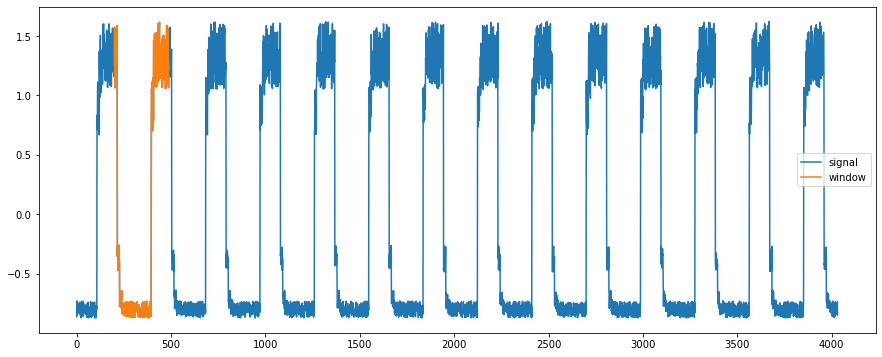

In [47]:


# 
window_no = 200

# 
fig, ax = plt.subplots(figsize=(15, 6))

# 
y = df_train_vals['value'].values

# 
ax.plot(np.arange(y.shape[0]), y, label='signal')

# The first window.
w = x_train[window_no].flatten()

# 
ax.plot(np.arange(w.shape[0]) + window_no, w, label='window')

ax.legend();

